# Ownership Data Firstlook

In [4]:
from pathlib import Path
import sys

project_dir = Path().resolve().parent.parent
sys.path.append(str(project_dir))

from config import PATHS
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [5]:
ownership_data_path_30_2024 = PATHS.ownership_data / "ownership-data-12-24.txt"

In [6]:
data_30_12_2024=pd.read_csv(ownership_data_path_30_2024, sep="|")

In [7]:
print(data_30_12_2024.shape)
print(data_30_12_2024.columns)
print(data_30_12_2024.dtypes)
data_30_12_2024.head()


(3273, 25)
Index(['Date', 'Code', 'Type', 'Sec. Num', 'Price', 'Local IS', 'Local CP',
       'Local PF', 'Local IB', 'Local ID', 'Local MF', 'Local SC', 'Local FD',
       'Local OT', 'Total', 'Foreign IS', 'Foreign CP', 'Foreign PF',
       'Foreign IB', 'Foreign ID', 'Foreign MF', 'Foreign SC', 'Foreign FD',
       'Foreign OT', 'Total.1'],
      dtype='object')
Date           object
Code           object
Type           object
Sec. Num      float64
Price           int64
Local IS        int64
Local CP        int64
Local PF        int64
Local IB        int64
Local ID        int64
Local MF        int64
Local SC        int64
Local FD        int64
Local OT        int64
Total           int64
Foreign IS      int64
Foreign CP      int64
Foreign PF      int64
Foreign IB      int64
Foreign ID      int64
Foreign MF      int64
Foreign SC      int64
Foreign FD      int64
Foreign OT      int64
Total.1         int64
dtype: object


,Date,Code,Type,Sec. Num,Price,Local IS,Local CP,Local PF,Local IB,Local ID,...,Foreign IS,Foreign CP,Foreign PF,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total.1
0,30-DEC-2024,AADI,EQUITY,7.786892e+09,8475,205077321,4819561133,29017556,41,1721876110,...,0,129942914,3699426,583131049,4300907,16959494,19541153,0,93203534,850778477
1,30-DEC-2024,AALI,EQUITY,1.924688e+09,6200,64377427,32641524,6502246,49700,179217147,...,1023500,6591168,18439091,9735096,1791264,26533589,24369119,190500,8537277,97210604
2,30-DEC-2024,ABBA,EQUITY,3.935893e+09,26,51650600,2353353305,0,0,1028337275,...,0,1320400,0,41020085,1940300,0,33800,0,0,44314585
3,30-DEC-2024,ABDA,EQUITY,6.208067e+08,3800,0,40248,0,98,396682,...,538582804,21728234,0,28003600,400,0,4400,0,30499400,618818838
4,30-DEC-2024,ABMM,EQUITY,2.753165e+09,3540,2009800,1482027033,86000,0,420692800,...,78000,804848167,4781686,3723768,109000,22530612,1416788,286485,7702134,845476640


## Check for Missing Values

In [8]:
nan_count_per_column = data_30_12_2024.isna().sum()
nan_count_per_column


Date            0
Code            0
Type            0
Sec. Num      255
Price           0
Local IS        0
Local CP        0
Local PF        0
Local IB        0
Local ID        0
Local MF        0
Local SC        0
Local FD        0
Local OT        0
Total           0
Foreign IS      0
Foreign CP      0
Foreign PF      0
Foreign IB      0
Foreign ID      0
Foreign MF      0
Foreign SC      0
Foreign FD      0
Foreign OT      0
Total.1         0
dtype: int64

In [9]:
null_data = data_30_12_2024.loc[data_30_12_2024['Sec. Num'].isna()]
null_data

,Date,Code,Type,Sec. Num,Price,Local IS,Local CP,Local PF,Local IB,Local ID,...,Foreign IS,Foreign CP,Foreign PF,Foreign IB,Foreign ID,Foreign MF,Foreign SC,Foreign FD,Foreign OT,Total.1
2722,30-DEC-2024,DBEM03XXSCF,DEBT CROWD FUNDING,NaN,1,0,0,0,0,375000000,...,0,0,0,0,0,0,0,0,0,0
2723,30-DEC-2024,DKSM07XXSCF,DEBT CROWD FUNDING,NaN,1,0,0,0,0,740170371,...,0,0,0,0,0,0,0,0,0,0
2724,30-DEC-2024,EGMS01X1SCF,DEBT CROWD FUNDING,NaN,1,0,0,0,0,400000000,...,0,0,0,0,0,0,0,0,0,0
2725,30-DEC-2024,EKDA01X1SCF,DEBT CROWD FUNDING,NaN,1,0,0,0,0,2000000000,...,0,0,0,0,0,0,0,0,0,0
2726,30-DEC-2024,EKDA01X2SCF,DEBT CROWD FUNDING,NaN,1,0,0,0,0,4000000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3268,30-DEC-2024,IDSR300725364S,BANK INDONESIA RUPIAH SECURITIES (SRBI),NaN,1,0,0,15900000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3269,30-DEC-2024,IDSR310125182S,BANK INDONESIA RUPIAH SECURITIES (SRBI),NaN,1,14000000000,0,5000000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3270,30-DEC-2024,IDSR310125364S,BANK INDONESIA RUPIAH SECURITIES (SRBI),NaN,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3271,30-DEC-2024,BJBR01PBCN1,PERPETUAL BONDS,NaN,1,189000000000,219000000000,120000000000,0,23720000000,...,0,0,0,0,0,0,0,0,0,0


In [10]:
null_data = data_30_12_2024[data_30_12_2024['Sec. Num'].isna()]
null_counts = null_data['Type'].value_counts()
total_counts = data_30_12_2024['Type'].value_counts()
null_ratio = null_counts / total_counts * 100
null_ratio = null_ratio.fillna(0)
null_ratio = null_ratio.sort_values(ascending=False)


null_ratio


Type
BANK INDONESIA RUPIAH SECURITIES (SRBI)    100.0
PERPETUAL BONDS                            100.0
SUKUK CROWD FUNDING                        100.0
DEBT CROWD FUNDING                         100.0
TERM NOTES                                   0.0
SUKUK                                        0.0
STRUCTURED WARRANT                           0.0
SPN                                          0.0
SBSN                                         0.0
RIGHT                                        0.0
NEGOTIABLE CERTIFICATE OF DEPOSIT            0.0
COMMERCIAL PAPER                             0.0
MUTUAL FUND                                  0.0
GOVERNMENT BOND                              0.0
EQUITY CROWDFUNDING (ECF)                    0.0
EQUITY                                       0.0
EBA                                          0.0
DANA INVESTASI REAL ESTATE                   0.0
CORPORATE BOND                               0.0
WARRANT                                      0.0
Name: count, dt

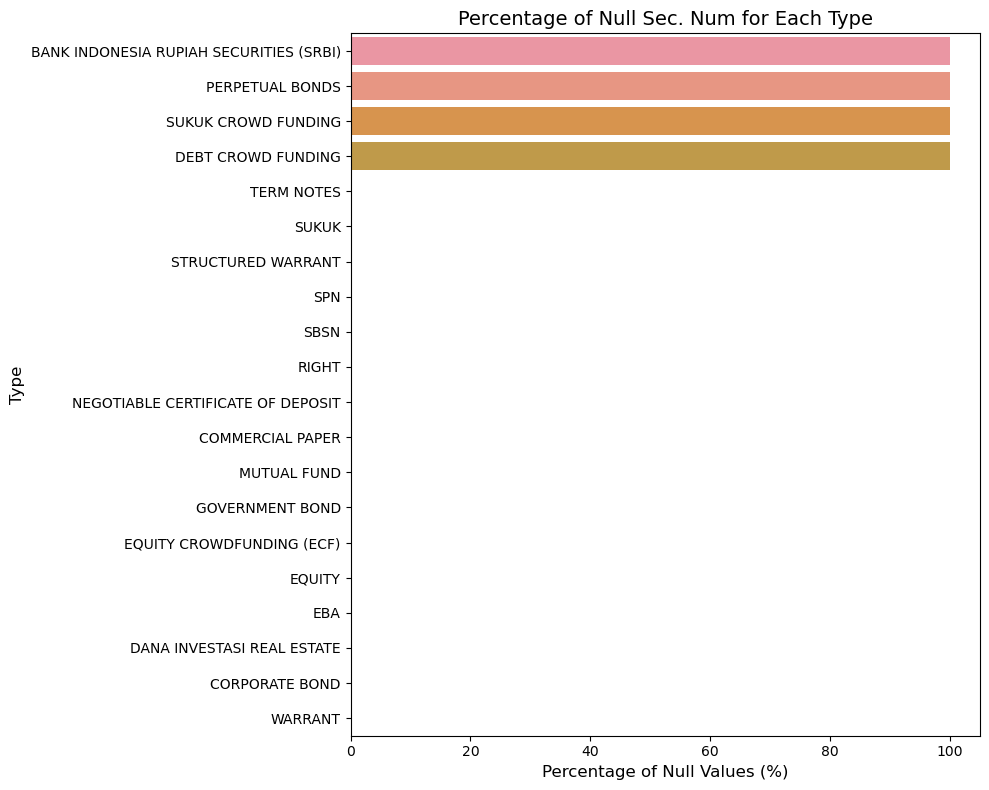

In [11]:
plt.figure(figsize=(10, 8))
sns.barplot(x=null_ratio.values, y=null_ratio.index)

plt.title('Percentage of Null Sec. Num for Each Type', fontsize=14)
plt.xlabel('Percentage of Null Values (%)', fontsize=12)
plt.ylabel('Type', fontsize=12)
plt.tight_layout()


plt.show()


## Check for discrepancies for rows with Sec. Num not null
### discrepancy=Sec.num - Sum

In [12]:
not_null = data_30_12_2024[data_30_12_2024['Sec. Num'] != 0]
not_null['Sum'] = not_null['Total']+not_null['Total.1']
not_null['Discrepancies']= not_null['Sec. Num']-not_null['Sum']


In [13]:
discrepant_data = not_null[not_null['Discrepancies'] != 0]
discrepancy_count = discrepant_data['Type'].value_counts()
total_counts = not_null['Type'].value_counts()
discrepancy_ratio = (discrepancy_count / total_counts * 100).fillna(0) 
discrepancy_ratio = discrepancy_ratio.sort_values(ascending=False)

discrepancy_ratio


Type
BANK INDONESIA RUPIAH SECURITIES (SRBI)    100.000000
RIGHT                                      100.000000
SUKUK CROWD FUNDING                        100.000000
DEBT CROWD FUNDING                         100.000000
SPN                                        100.000000
GOVERNMENT BOND                            100.000000
PERPETUAL BONDS                            100.000000
SBSN                                        97.916667
MUTUAL FUND                                 97.500000
EQUITY                                      73.237998
EQUITY CROWDFUNDING (ECF)                   68.979592
DANA INVESTASI REAL ESTATE                  50.000000
WARRANT                                      5.769231
TERM NOTES                                   0.578035
COMMERCIAL PAPER                             0.000000
EBA                                          0.000000
STRUCTURED WARRANT                           0.000000
SUKUK                                        0.000000
CORPORATE BOND         

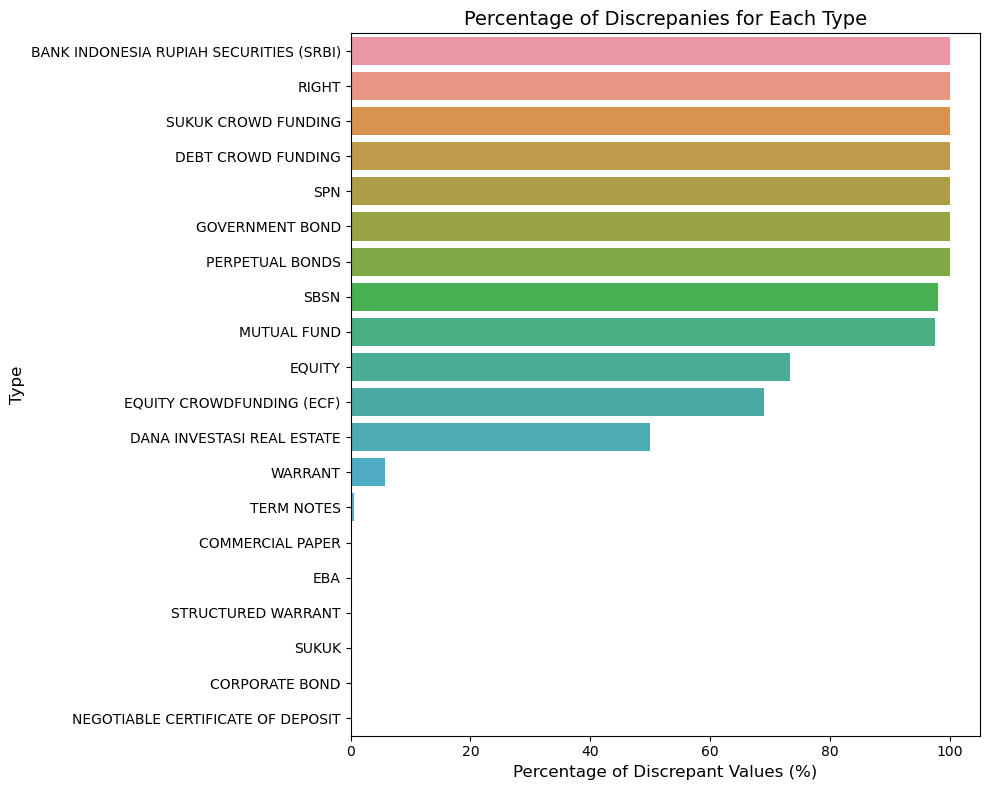

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(x=discrepancy_ratio.values, y=discrepancy_ratio.index)

plt.title('Percentage of Discrepanies for Each Type', fontsize=14)
plt.xlabel('Percentage of Discrepant Values (%)', fontsize=12)
plt.ylabel('Type', fontsize=12)
plt.tight_layout()

plt.show()


### Investing source of descrepencies   

In [15]:
%%capture
discrepant_data["Local Total"] = discrepant_data.filter(like="Local").sum(axis=1)
discrepant_data["Foreign Total"] = discrepant_data.filter(like="Foreign").sum(axis=1)


discrepant_data["Local Discrepancy"] = discrepant_data["Total"] - discrepant_data["Local Total"]
discrepant_data["Foreign Discrepancy"] = discrepant_data["Total.1"] - discrepant_data["Foreign Total"]


In [16]:
local_discrepant_data = discrepant_data[discrepant_data['Local Discrepancy'] != 0]
local_discrepancy_count = local_discrepant_data['Type'].value_counts()

local_discrepancy_ratio = (local_discrepancy_count / discrepancy_count * 100).fillna(0) 
local_discrepancy_ratio = local_discrepancy_ratio.sort_values(ascending=False)

local_discrepancy_ratio

Type
EQUITY                                     0.0
EQUITY CROWDFUNDING (ECF)                  0.0
SUKUK CROWD FUNDING                        0.0
GOVERNMENT BOND                            0.0
BANK INDONESIA RUPIAH SECURITIES (SRBI)    0.0
SBSN                                       0.0
MUTUAL FUND                                0.0
DEBT CROWD FUNDING                         0.0
SPN                                        0.0
WARRANT                                    0.0
DANA INVESTASI REAL ESTATE                 0.0
PERPETUAL BONDS                            0.0
RIGHT                                      0.0
TERM NOTES                                 0.0
Name: count, dtype: float64

In [17]:
foreign_discrepant_data = discrepant_data[discrepant_data['Foreign Discrepancy'] != 0]
foreign_discrepancy_count = foreign_discrepant_data['Type'].value_counts()

foreign_discrepancy_ratio = (foreign_discrepancy_count / discrepancy_count * 100).fillna(0) 
foreign_discrepancy_ratio = foreign_discrepancy_ratio.sort_values(ascending=False)

foreign_discrepancy_ratio

Type
EQUITY                                     0.0
EQUITY CROWDFUNDING (ECF)                  0.0
SUKUK CROWD FUNDING                        0.0
GOVERNMENT BOND                            0.0
BANK INDONESIA RUPIAH SECURITIES (SRBI)    0.0
SBSN                                       0.0
MUTUAL FUND                                0.0
DEBT CROWD FUNDING                         0.0
SPN                                        0.0
WARRANT                                    0.0
DANA INVESTASI REAL ESTATE                 0.0
PERPETUAL BONDS                            0.0
RIGHT                                      0.0
TERM NOTES                                 0.0
Name: count, dtype: float64

## Foreign ownership invstigation

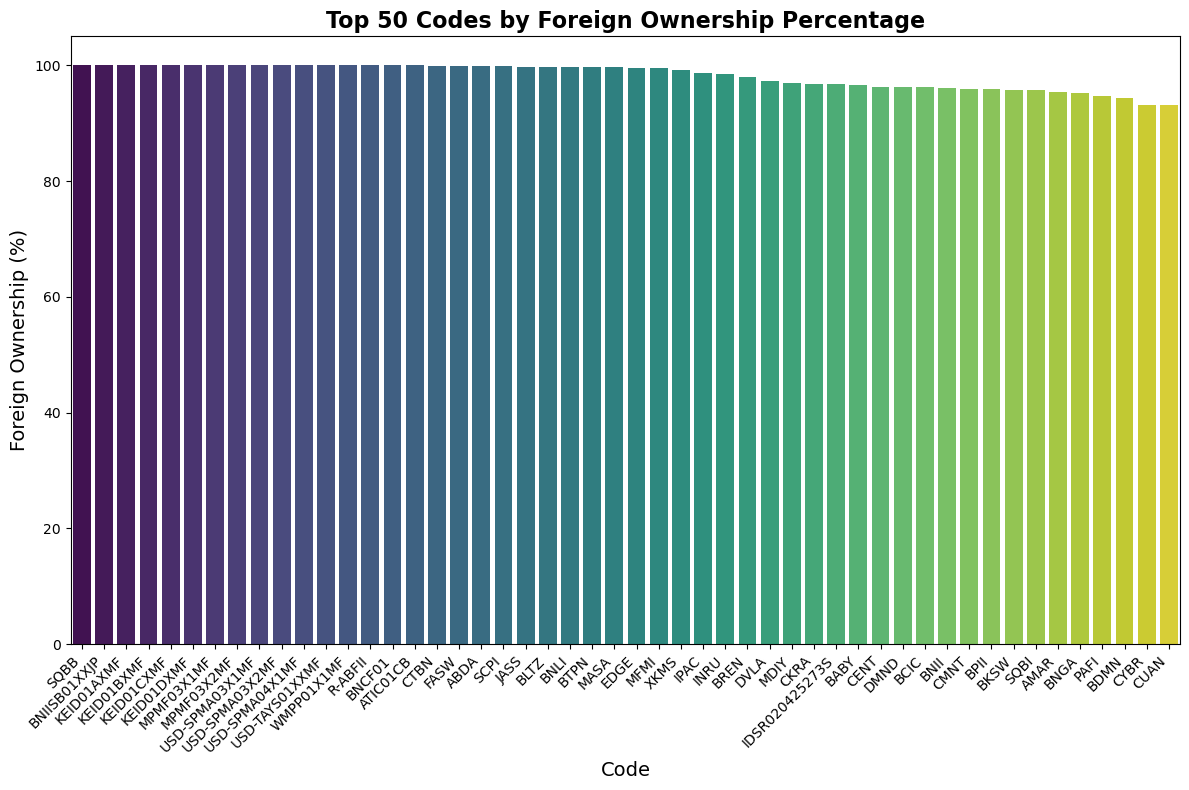

In [18]:
data_30_12_2024['Sum'] = data_30_12_2024['Total'] + data_30_12_2024['Total.1']

data_30_12_2024['Foreign Ownership %'] = (data_30_12_2024['Total.1'] / data_30_12_2024['Sum']) * 100


top_50 = data_30_12_2024.nlargest(50, 'Foreign Ownership %')


plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_50['Code'], 
    y=top_50['Foreign Ownership %'], 
    palette="viridis"
)

plt.title('Top 50 Codes by Foreign Ownership Percentage', fontsize=16, weight='bold')
plt.xlabel('Code', fontsize=14)
plt.ylabel('Foreign Ownership (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()


plt.show()


## Graphic is not useful, let's try split by investment type

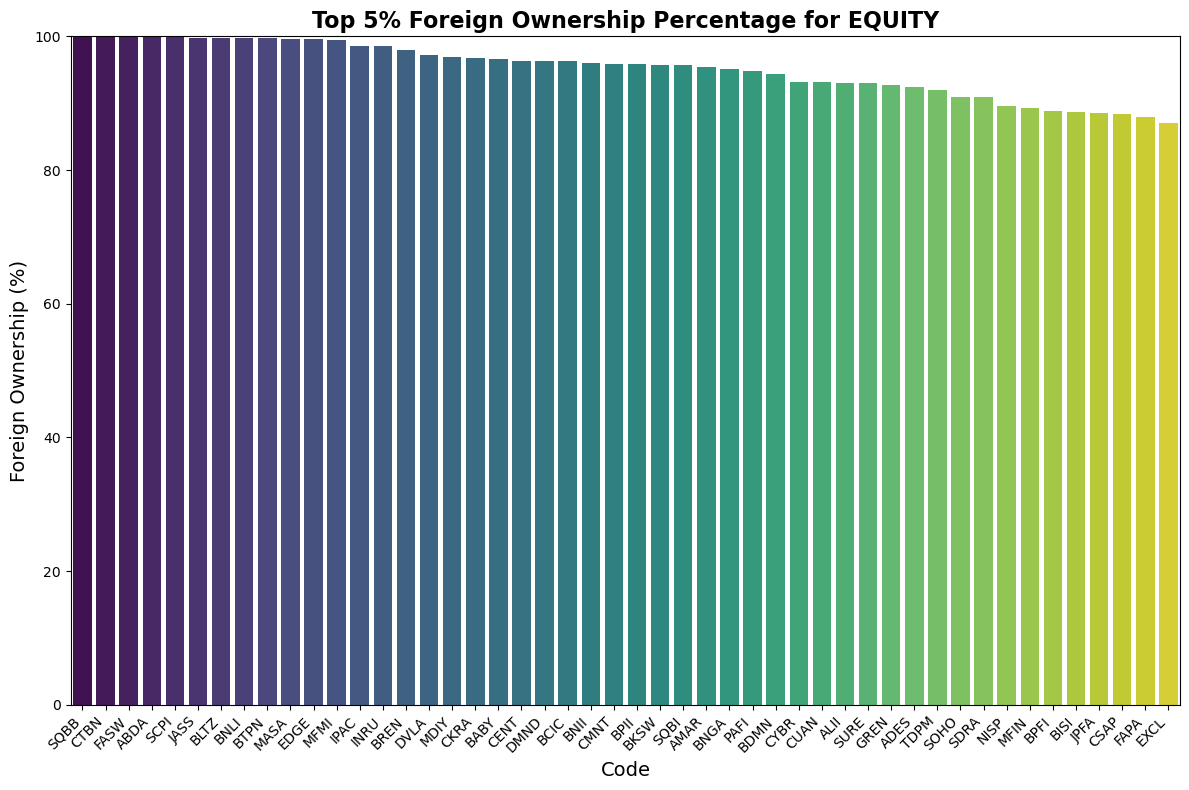

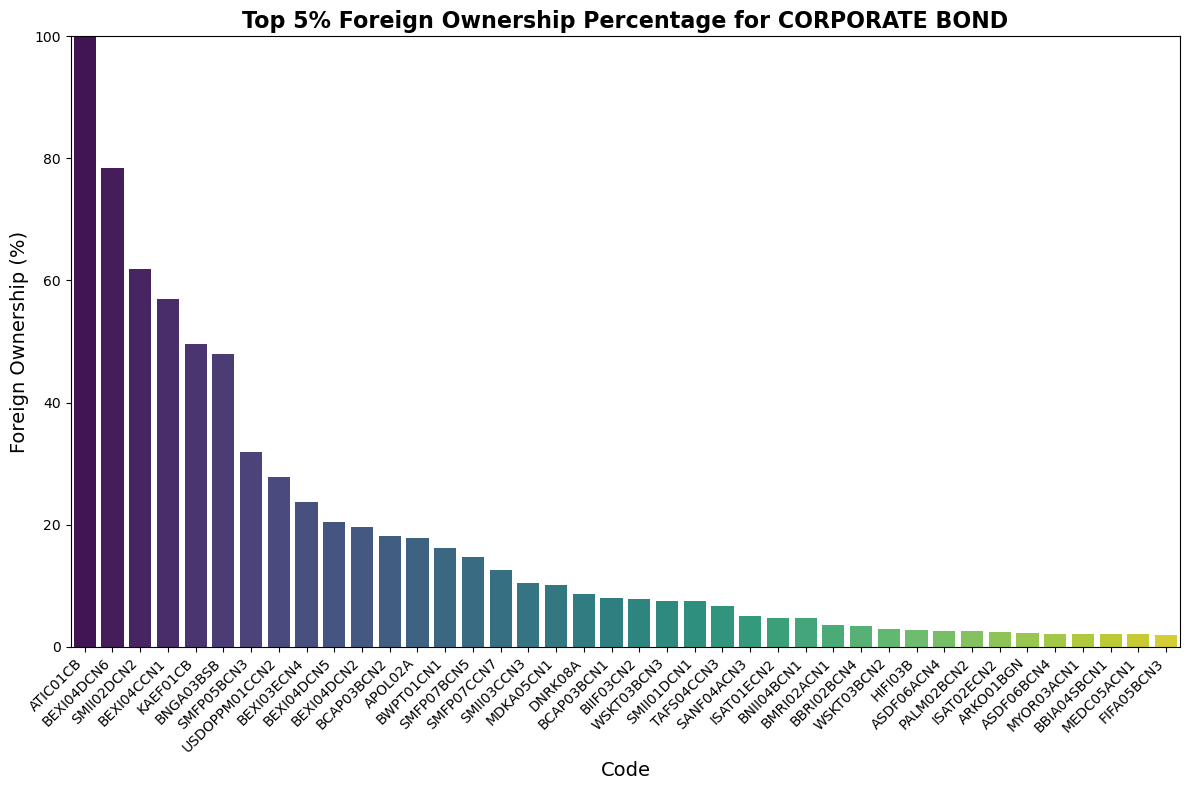

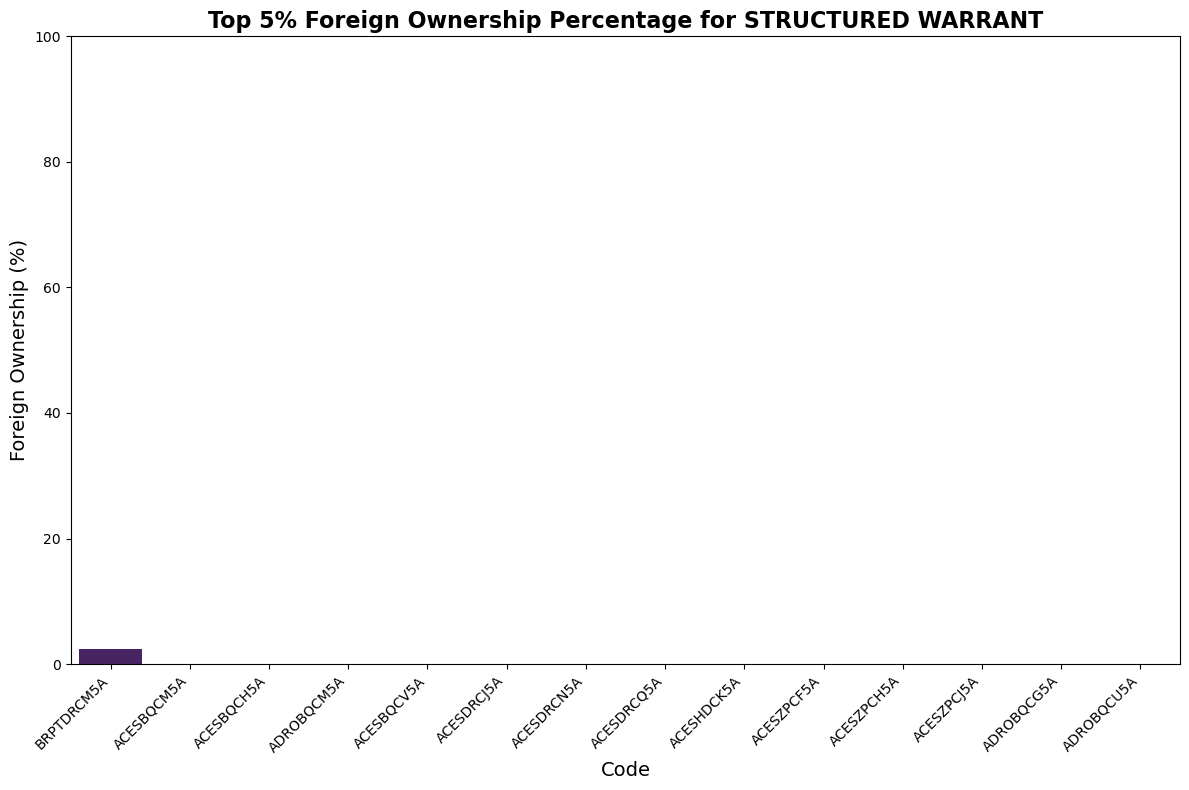

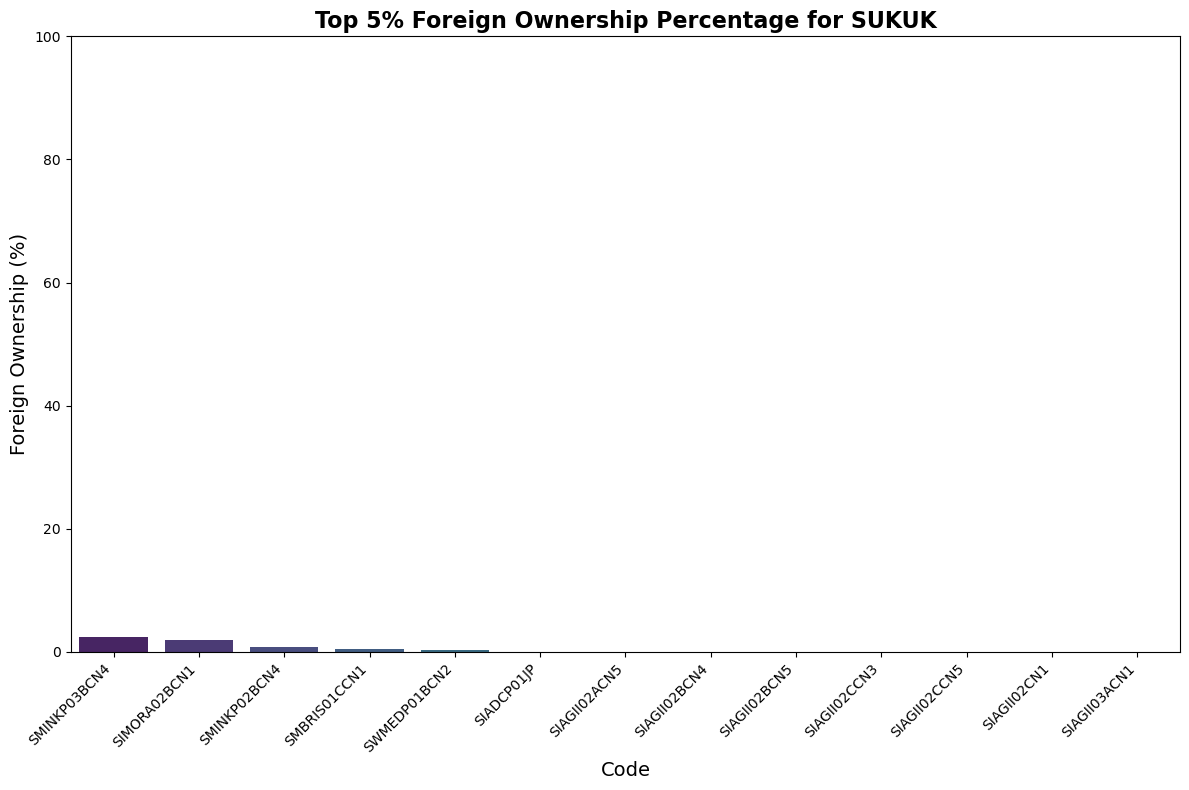

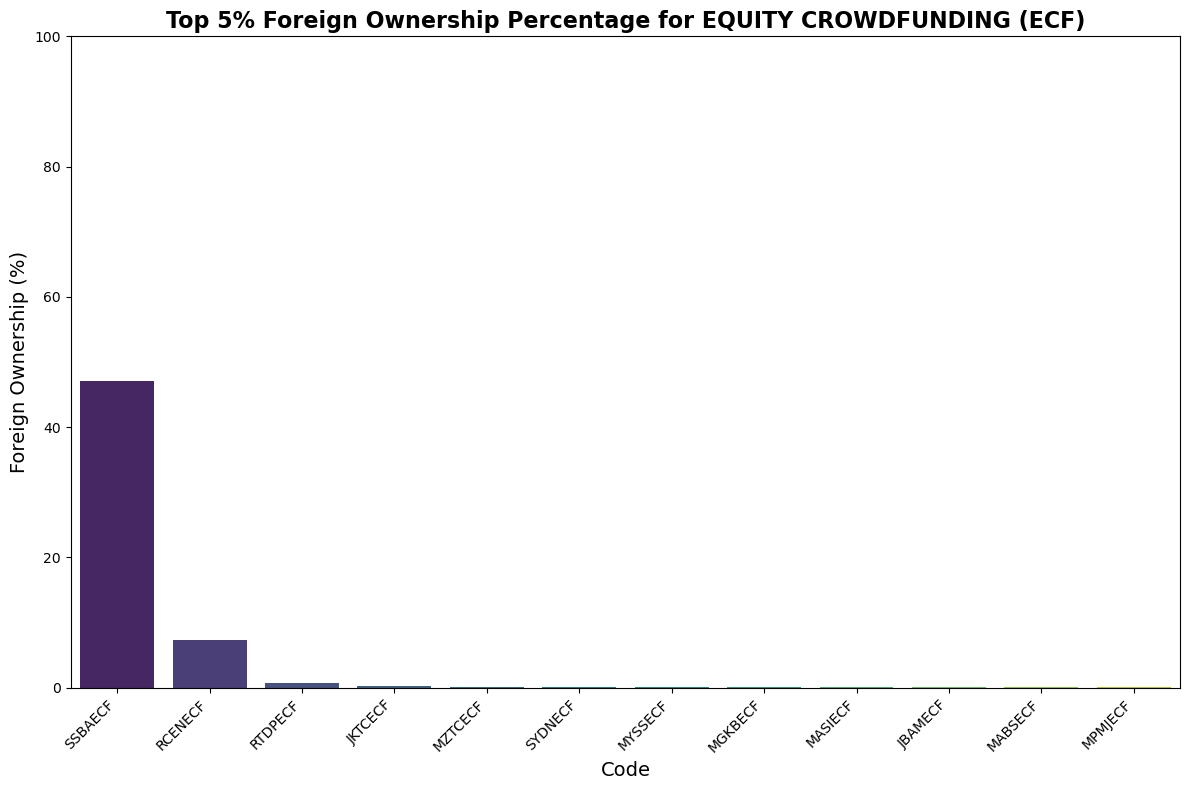

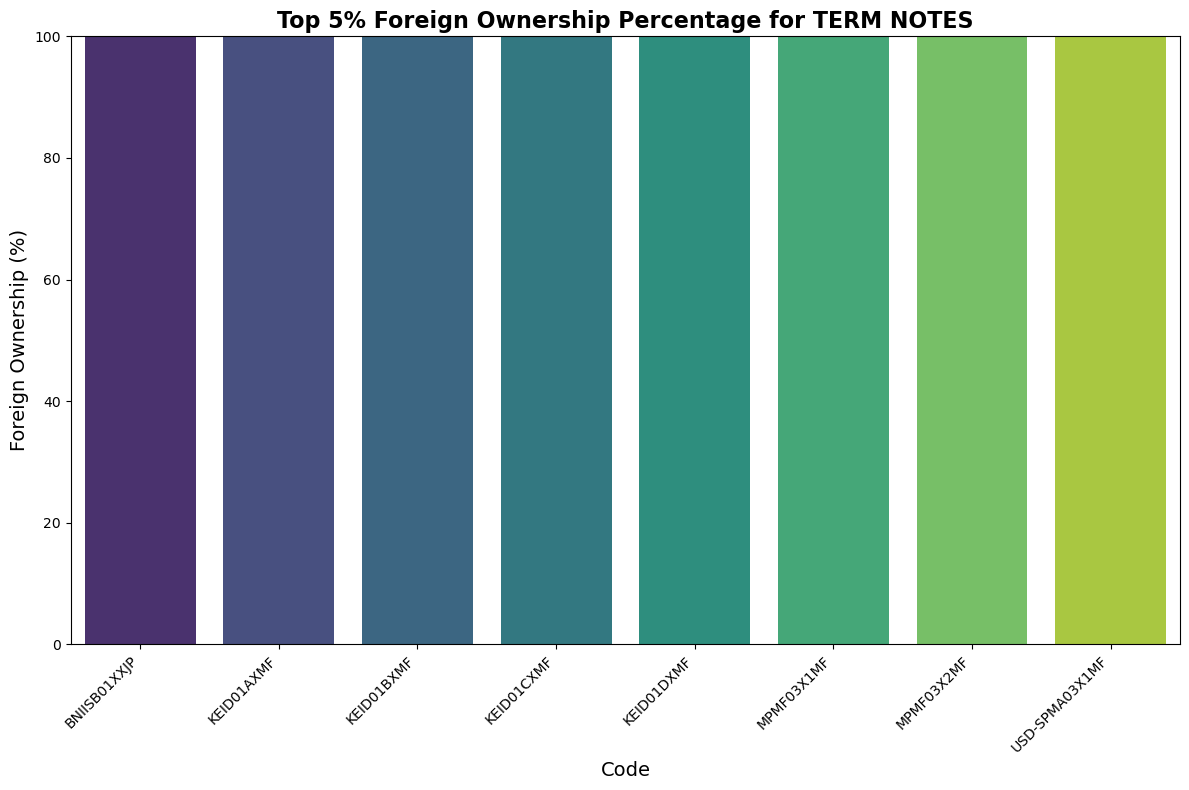

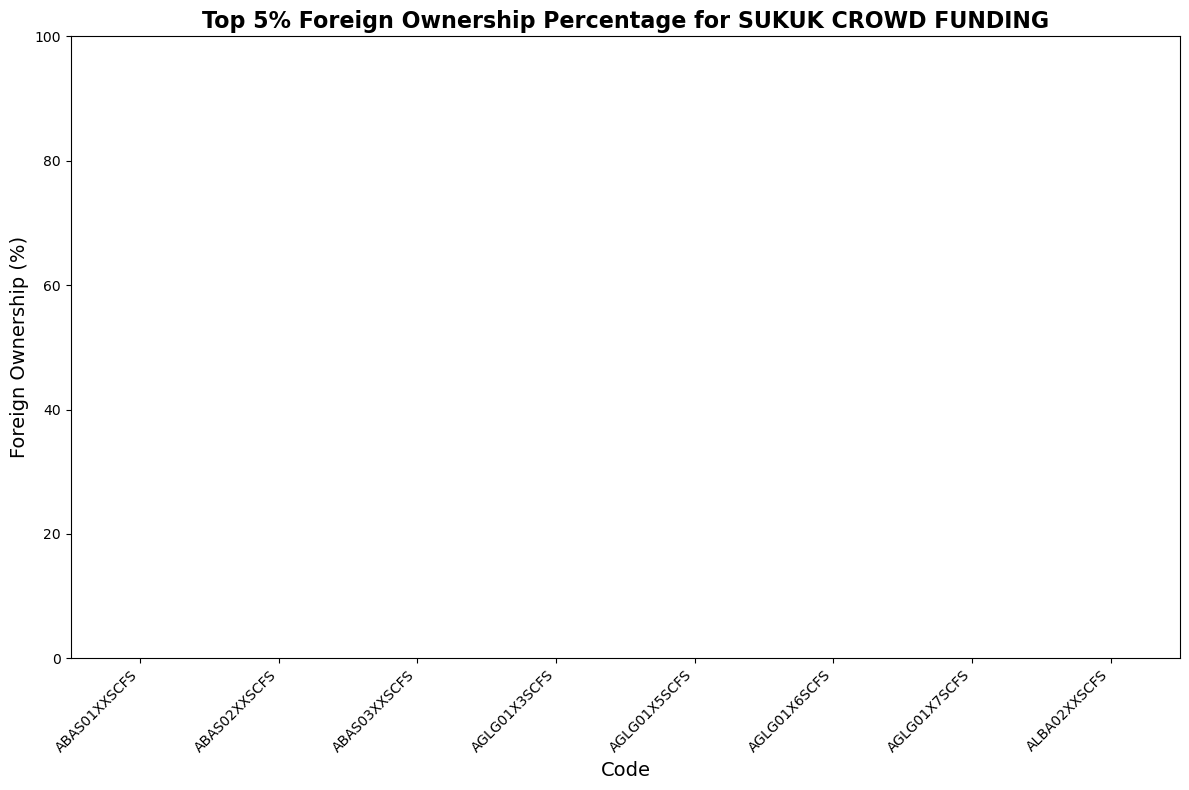

In [19]:
investment_types = data_30_12_2024['Type'].value_counts()
valid_types = investment_types[investment_types >= 100].index


for investment_type in valid_types:
    
    filtered_data = data_30_12_2024[data_30_12_2024['Type'] == investment_type]

    top_5_percent = filtered_data.nlargest(int(len(filtered_data) * 0.05), 'Foreign Ownership %')
    
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x=top_5_percent['Code'], 
        y=top_5_percent['Foreign Ownership %'], 
        palette="viridis"
    )
    
    plt.title(f'Top 5% Foreign Ownership Percentage for {investment_type}', fontsize=16, weight='bold')
    plt.xlabel('Code', fontsize=14)
    plt.ylabel('Foreign Ownership (%)', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    plt.ylim(0, 100)

    plt.tight_layout()

    plt.show()


### 3 interesting types of products are Equities, Term-notes and Corporate Bond

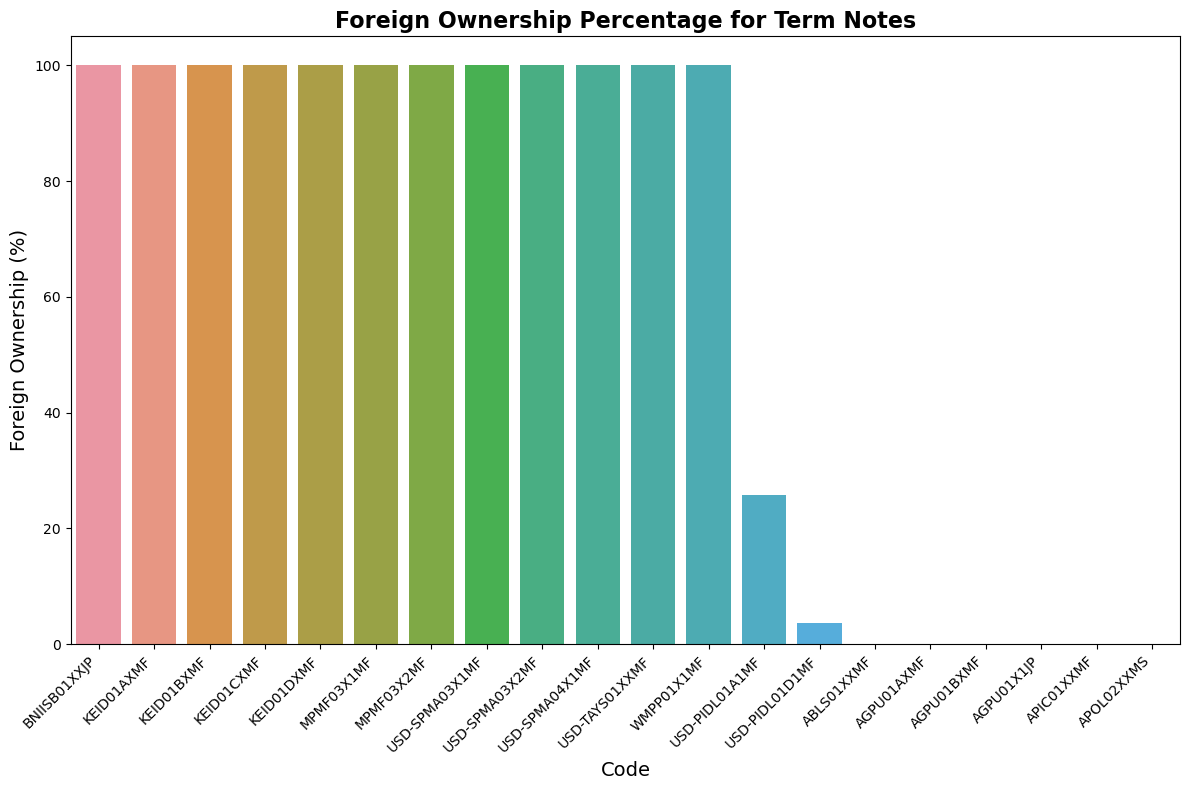

In [20]:
plt.figure(figsize=(12, 8))
term_notes_data = data_30_12_2024[data_30_12_2024['Type'] == 'TERM NOTES']
top_20 = term_notes_data.nlargest(20, 'Foreign Ownership %')

sns.barplot(
    x=top_20['Code'], 
    y=top_20['Foreign Ownership %']
)

plt.title('Foreign Ownership Percentage for Term Notes', fontsize=16, weight='bold')
plt.xlabel('Code', fontsize=14)
plt.ylabel('Foreign Ownership (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()


plt.show()
